# Multiple Linear Regression

## Objectives

- Assessing the accuracy of the coefficients 
- Feature Selection
- Understanding the accuracy of the model
- qq-plots and residuals

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns

In [64]:
df = pd.read_csv('data/Advertising.csv', index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


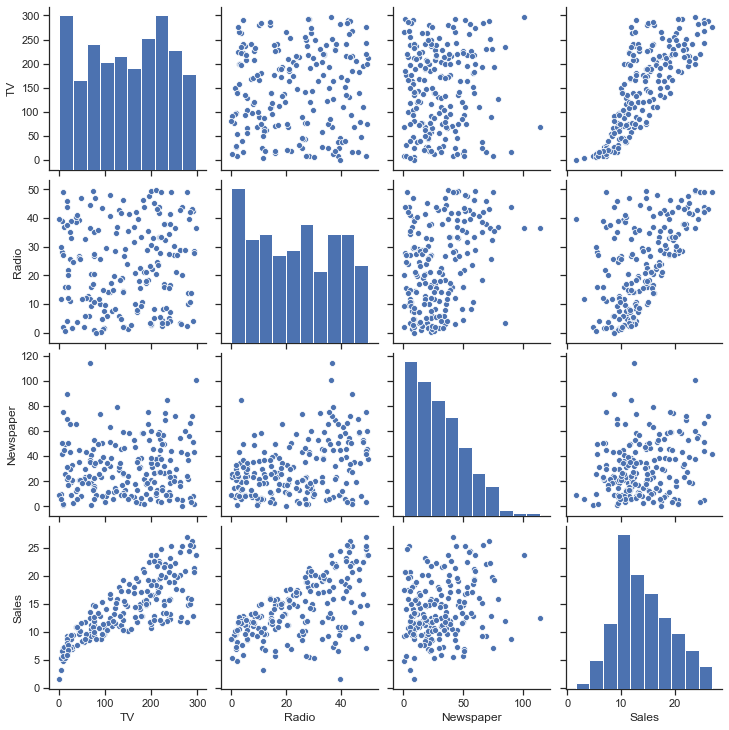

In [3]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)
plt.show()

Recall that yesterday we only used one variable X = 'TV' to be able to under y= 'Sales'. Today we will use all of the variables given in the dataset.

__Your Turn__

- Before we move to multiple linear regression, let's practice yesterday's skills a little bit more.

- This time use X = 'Newspaper' variable and fit a simple (one variable) linear regression to y= 'Sales'

- Use statsmodels package again.

In [4]:
# First define X and y variables

X = df['Newspaper']

y = df['Sales']

In [5]:
# Import statsmodel API -- recall that we call it 'sm'
import statsmodels.api as sm


# Now we can add constants to X
# recall that sm has an add_constant method
Xconst = sm.add_constant(X)

In [12]:
# Now we can instantiate OLS class in sm.
# Don't forget to instantiate OLS with both X and y
model = sm.OLS(y, Xconst)

# fit the model by calling fit() method.

fitted_model = model.fit()

# Let's check the model with summary method

In [13]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     10.89
Date:                Wed, 24 Jun 2020   Prob (F-statistic):            0.00115
Time:                        10:12:30   Log-Likelihood:                -608.34
No. Observations:                 200   AIC:                             1221.
Df Residuals:                     198   BIC:                             1227.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.3514      0.621     19.876      0.000      11.126      13.577
Newspaper      0.0547      0.017      3.300      0.001       0.022       0.087
==============================================================================
Omnibus:                        6.231   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.483
Skew:                           0.330   Prob(JB):                       0.0645
Kurtosis:                       2.527   Cond. No.                         64.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Using sklearn__

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
sk_model = LinearRegression()

In [25]:
df[['Newspaper']] 
#dataframe

,Newspaper
1,69.2
2,45.1
3,69.3
4,58.5
5,58.4
...,...
196,13.8
197,8.1
198,6.4
199,66.2


In [23]:
# X = X.values.reshape(-1,1)

In [26]:
sk_model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [28]:
sk_model.coef_

array([0.0546931])

In [29]:
sk_model.intercept_

12.35140706927816

In [30]:
from sklearn.metrics import r2_score

In [32]:
r2_score(y, sk_model.intercept_ + sk_model.coef_ * X)

0.05212044544430516

In [33]:
r2_score(y, sk_model.predict(X))

0.05212044544430516

## Checking Correlation between Newspaper and Sales

We can check correlation between two variables in a couple of different ways depending on the data types of the variables.

In [57]:
## Correlation with columns of dataframes

df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,-0.479765,-0.803372,0.829673
Radio,-0.479765,1.000000,-0.060602,0.083812
Newspaper,-0.803372,-0.060602,1.000000,-0.914662
Sales,0.829673,0.083812,-0.914662,1.000000


Note as as we discussed yesterday (__only in one variable__) $R^{2}$ = $(\text{pearson-r})^{2}$

In [58]:
# Manually calc correlation for TV & Sales
X = df['TV']
Y = df['Sales']
((X - X.mean()) * (Y - Y.mean())).mean() / (np.std(X) * np.std(Y))

0.8296728720003778

In [59]:
# r^2 is also (TSS-RSS) / TSS 

In [60]:
## check the R_squared from the summary, pearson-r = correlation coeefficient 

0.228299**2

0.052120433401

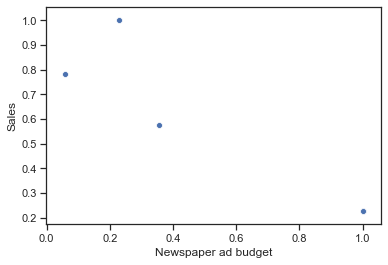

In [61]:
# let's plot df
sns.scatterplot(df['Newspaper'], df['Sales'])

plt.xlabel('Newspaper ad budget')

plt.ylabel('Sales')
plt.show()

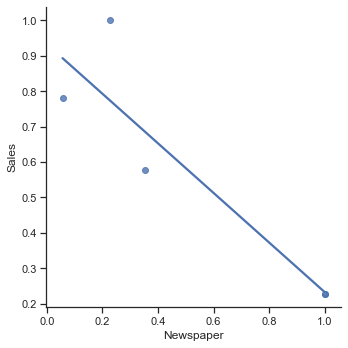

In [62]:
# seaborn has a very hand method lmplot for regression visualizations
sns.lmplot(x='Newspaper', y='Sales', data=df, ci=0)

# Multiple Linear Regression

- When we have more than one variable our linear model will look like as:

__MODEL__

$$ Y = \beta_{0} + \beta_{1} X_{1} + \beta_{2}X_{2} + \cdots \beta_{p}X_{p} + \epsilon$$


__Notation:__

- $X_{1}, \cdots, X_{p}$ :  Columns of the dataset (or features or predictors or independent variables)

- $Y$ : target column in the dataset (or target variable or dependent variable)

- $\epsilon$ : Irreducible error.

__Goal:__ Given a dataset $X$ (in our case whole advertising dataset) we would like to find estimates $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$ from this data (sample) for the (population) parameters $\beta_{0}, \cdots, \beta_{p}$

- Once $\hat{\beta}_{1}, \cdots, \hat{\beta}_{p}$  are given, then we can make predictions for new observations:

$$ \hat{y} = \hat{\beta}_{0} + \hat{\beta}_{1} x_{1} +\hat{\beta}_{2}x_{2} + \cdots \hat{\beta}_{p}x_{p} $$

for a given observation (sample or row) $x = [x_{1}, \cdots, x_{p}]$

- Cost function (objective function) become:

\begin{align}
RSS &= \sum\limits_{i=1}^{n} (y_{i} - \hat{y}_{i})^{2} \\
&= \sum\limits_{i=1}^{n} (y_{i} - \hat{\beta}_{0} - \hat{\beta}_{1} x_{i1}  - \hat{\beta}_{2}x_{i2} - \cdots  - \hat{\beta}_{p}x_{ip})^{2}
\end{align}

Fitting a multiple linear regression with statsmodels API is as easy as simple linear regression

In [69]:
Xconst = Xconst.drop(columns='Newspaper')

In [66]:
# This time note that we are using all of the independent variables
# 'TV', 'Newspaper', 'Radio'
X = df.drop(columns=['Sales'])

# Target variable (Dependent Variable) is still 'Sales' column
y = df.Sales

# We need to add constants for the intercept term
Xconst = sm.add_constant(X)

# Note that the rest is exactly the same with the simple linear regression
model = sm.OLS(y, Xconst, hasconst=True)
multiple_model_fitted = model.fit()
multiple_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.58e-96
Time:                        10:48:44   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
trimmed_model = sm.OLS(y, Xconst,hconst=True)
trimmed_model_fitted = trimmed_model.fit()
trimmed_model_fitted.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           4.83e-98
Time:                        10:51:09   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
tv_model = sm.OLS(y, Xconst.drop(columns='Radio'), hasconst=True)
tv_results = tv_model.fit()
tv_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 24 Jun 2020   Prob (F-statistic):           1.47e-42
Time:                        11:00:07   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

__Q1:__ Why do we initially get a statistically significant result for the relation between Sales and Newspaper but in the multiple case model tell us that relation is not significant?

In [ ]:
## note that There is a correlation between Newspaper and Radio
## This reveals a tendency to spend more on newspaper advertising 
## in markets where more is spent on radio advertising. 

df.corr()

__Question:__ How do we choose important variables

- Straight forward selection: try all possible combination with variables and use AIC, BIC etc to choose best.

- Forward selection:

    1. Start with null model
    2. Then one linear model for each separate variables
    3. Pick the variable with lowest RSS
    4. We then add to that model the variable that results variable selection 
    in the lowest RSS for the new two-variable model.
    5. Repeat this until a stoppage criteria is achieved.
- Backward selection

- Mixed Selection

## Inference vs Prediction

- Here let's talk a little bit about inference vs prediction

## Diagnosis: Residuals and QQ-plots

In [ ]:
# let's see the results one more time
features = ['TV', 'Newspaper', 'Radio']
X = df[features]
y = df.Sales
X = sm.add_constant(X)
mod = sm.OLS(y, X, hasconst=True)
res = mod.fit()
res.summary()

__Your Turn!__

Recall that we initially assumed that the errors should be normally distributed with mean zero and fixed variance. 

__Q:__ Find the residuals and check their distribution.

In [ ]:
# %load -r 24-26 supplement.py
plt.hist(res.resid)

In [ ]:
sample_1 = np.random.normal(loc=0, scale=5, size=30)
np.quantile(sample_1, q=0.01)

In [ ]:
import scipy.stats as stats
stats.norm.ppf(loc = 0, scale = 1, q=0.01)
np.quantile(sample_1, q= 0.02)

In [ ]:
x_list = []
y_list = []
for q in np.linspace(0.001,1, 100):
        x_list.append(np.quantile(sample_1, q = q))
        y_list.append(stats.norm.ppf(loc = 0, scale = 1, q=q))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.scatter(x_list, y_list)

In [ ]:
stats.normaltest(residuals)

In [ ]:
fig = sm.qqplot(residuals, line = 'r')
plt.show()

In [ ]:
y_pred = res.predict(X)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color = 'red', label = '0')

plt.xlabel('predicted values')

plt.ylabel('residuals')

plt.tight_layout()

- Correlation with numpy

[Documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html)

In [ ]:
# for numpy ndarrays
from scipy.stats.stats import pearsonr
X = df.Newspaper.values
y = df.Sales.values

pearsonr(X, y)

# The first one is the pearson-r coefficient and the other one is the p-value related to this coefficient.

## Using sklearn
Fit a multiple linear regression model to this dataset:

First try to solve this own your own - then you can check the answer below.

[Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

- Questions related to the F-statistics

### Additional Reading
[page 75 of ISLR](https://faculty.marshall.usc.edu/gareth-james/ISL/)

[check F-distribution](https://en.wikipedia.org/wiki/F-distribution#/media/File:F-distribution_pdf.svg)